# Time Series Decomposing
A time series is said to be stationary if its statistical properties such as mean,variance remain constant over time.  


In [1]:
# !pip install statsmodels
# !pip install sklearn

In [12]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller

%matplotlib inline
rcParams['figure.figsize'] = 15, 6

In [3]:
# laod dataset
# Number of passengers of an airline company per month
# Reading month as time and using it as index
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')  #parse a string and returns a date
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], date_parser=dateparse, index_col='Month')
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
def test_stationarity(timeseries):
    # rolling over one year
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    print('p-value=', dftest[1])
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

## Analysis of Trend in Time Series
### Not stationnary, solutions:
-   **Aggregation** – taking average for a time period like monthly/weekly averages
-   **Smoothing** – taking rolling averages
-   **Polynomial Fitting** – fit a regression model
- **Dickey-FullerTest**


Results of Dickey-Fuller Test:
p-value= 0.991880243437641


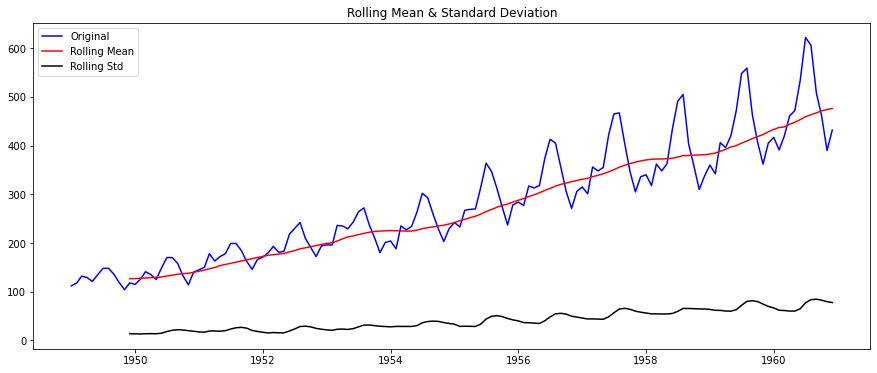

In [5]:
ts = data['#Passengers'] 
test_stationarity(ts)

### we can apply transformation which penalize higher values more than smaller values. 
**These can be taking a log, square root, cube root, etc. Lets take a log transform here for simplicity:** 

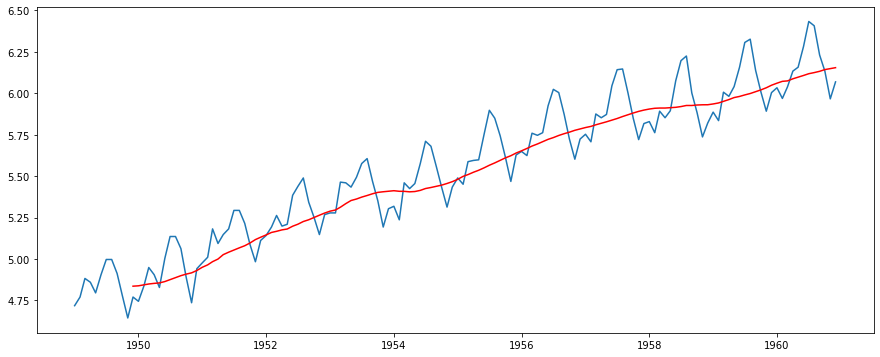

In [6]:
ts_log = np.log(ts)
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red');
plt.show()

## How to make it stationary?
Simplest Technique:Smoothing  
**Smoothed Series = Original_Series − Rolling_Means (moving avg)**  
Check the p-value, is the time series stationary?

Results of Dickey-Fuller Test:
p-value= 0.0222346300012441


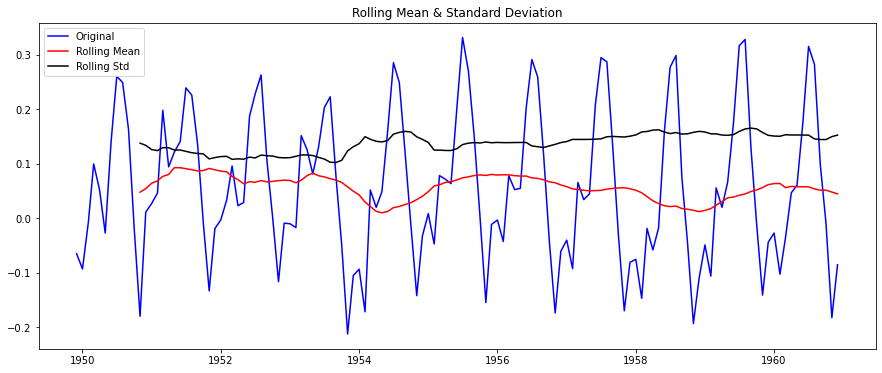

In [7]:
ts_log_moving_avg_diff = ts_log - moving_avg
#first values (less than 12) do not have enough previous values to calculate moving average

ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)
#Check the p-value, is the time series stationary now?

Results of Dickey-Fuller Test:
p-value= 0.005736938801512008


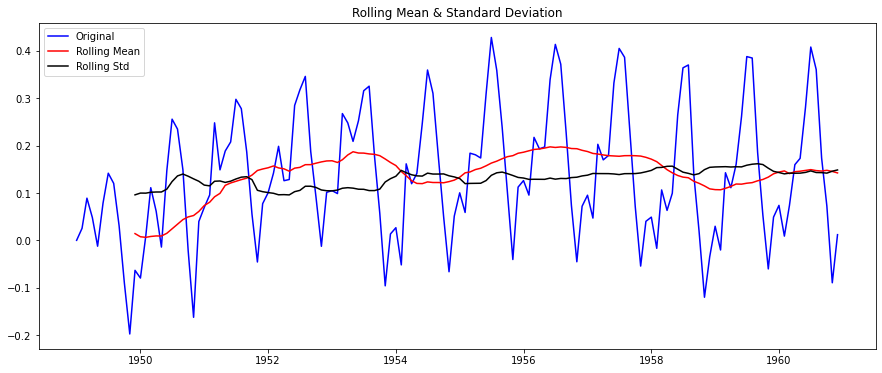

In [8]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)
#Is the p-value better with this method?

## What about Seasonality with Trend?
Smoothing is typically good only for Trends. Other techniques:
- **Differencing**: taking the difference with aparticular timelag
- **Decomposition**: modeling both trend andseasonality and removing them from themodel.

## Differencing

Results of Dickey-Fuller Test:
p-value= 0.0711205481508603


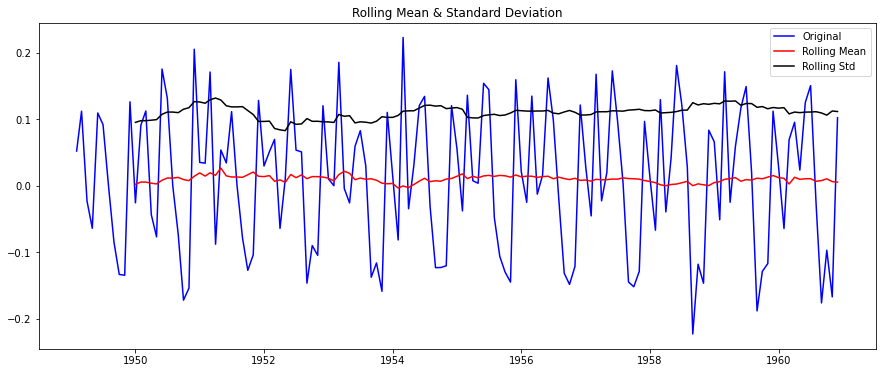

In [9]:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

## Decomposing

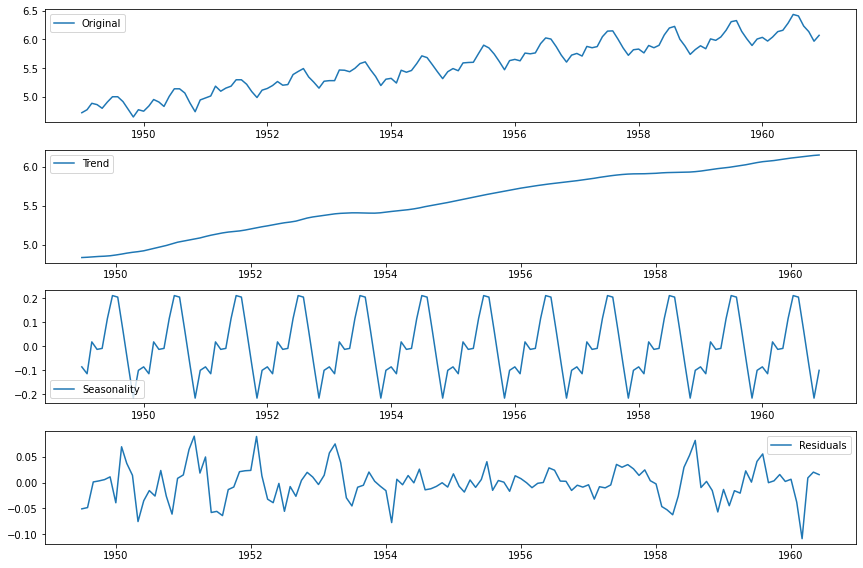

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12,8))

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Results of Dickey-Fuller Test:
p-value= 2.885058903323241e-08


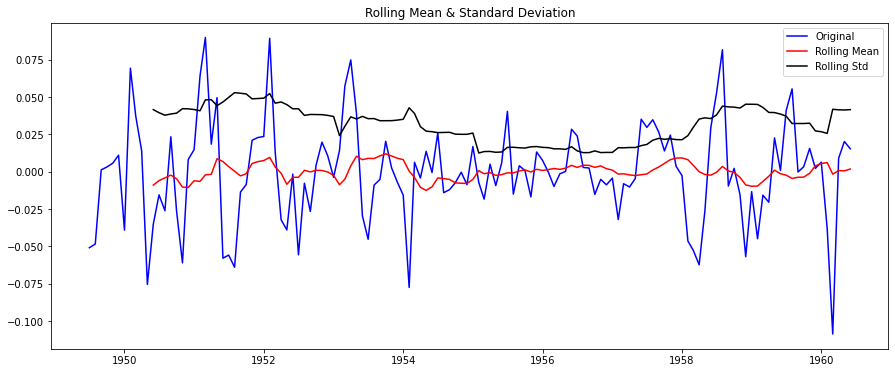

In [11]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)
#Check the p-value of the residual after decomposition